# Feature Description

1.2 Features Description

__Categorical Attributes__

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
Individual's highest education degree
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
Individual marital status
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
Individual's occupation
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
Individual's relation in a family
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
Race of Individual
sex: Female, Male.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country

__Continuous Attributes__

age: continuous.
Age of an individual
fnlwgt: final weight, continuous.
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
Individual's working hour per week

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df_income = pd.read_csv('./income_evaluation.csv')
df_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_income.shape

(32561, 15)

# EDA

In [4]:
df_income.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [5]:
df_income.loc[:, [' workclass', ' education', 
       ' marital-status', ' occupation', ' relationship', ' race', ' sex'
       ]] [:10]

,workclass,education,marital-status,occupation,relationship,race,sex
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male


In [6]:
df_income[' income'].head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name:  income, dtype: object

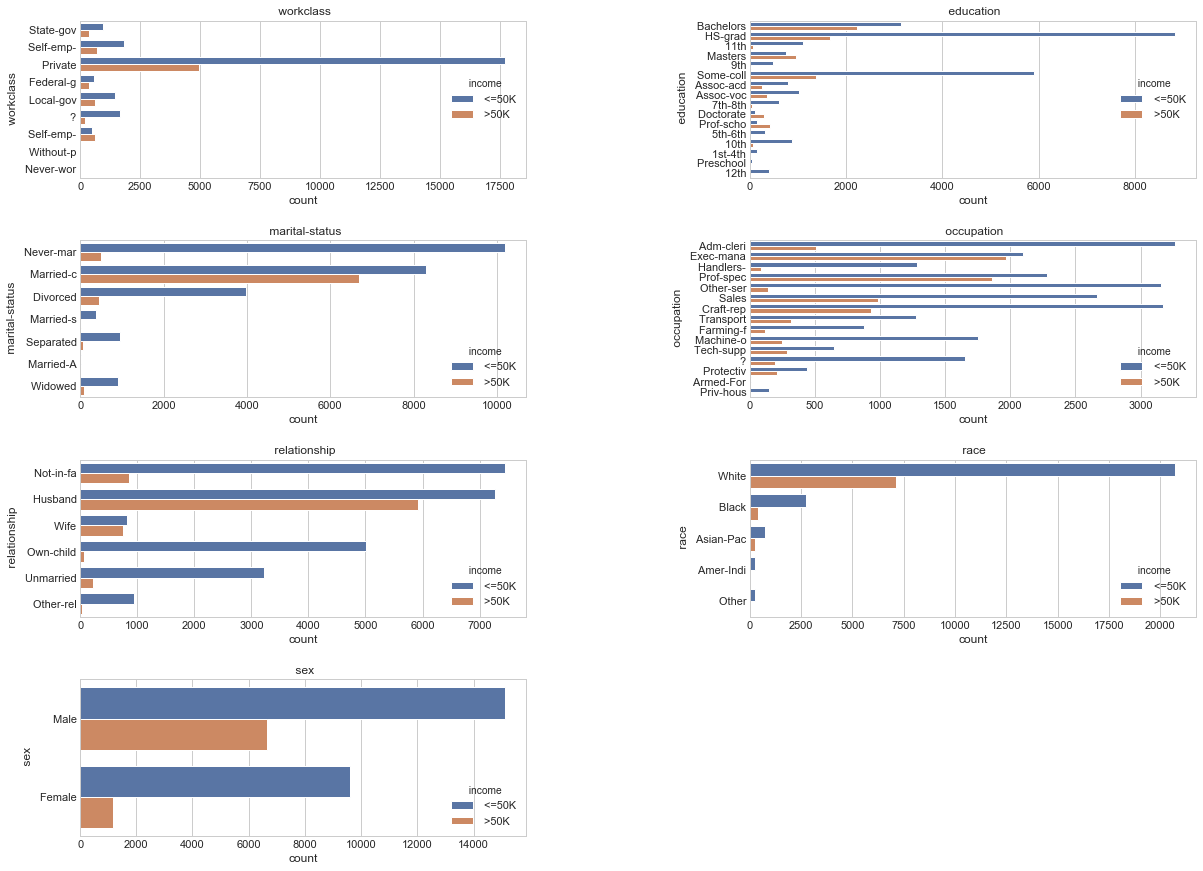

In [7]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = df_income.loc[:, [' workclass', ' education', 
       ' marital-status', ' occupation', ' relationship', ' race', ' sex'
       ]]  

plot_bivariate_bar(bivariate_df, hue=df_income[' income'], cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

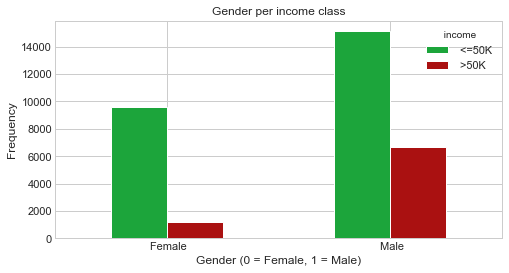

In [8]:
pd.crosstab(df_income[' sex'],df_income[' income']).plot(kind="bar",figsize=(8,4),color=['#1CA53B','#AA1111' ])
plt.title('Gender per income class')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


# Lazy Predict 
> Lazy Predict help build a lot of basic models without much code and helps understand which models works better without any parameter tuning

Free software: MIT license
Documentation: https://lazypredict.readthedocs.io.

#### Documentation

> URL: https://lazypredict.readthedocs.io/en/latest/installation.html

#### Author
> Shankar Rao Pandala

#### pip install

In [9]:
#! pip install lazypredict

#### Import Library

In [11]:
import lazypredict
#from lazypredict.Supervised import LazyClassifier  #LazyRegressor
from sklearn.model_selection import train_test_split

### Classification Example

In [12]:
y= df_income[' income']
X = df_income.drop(' income', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

NameError: name 'LazyClassifier' is not defined

> NameError: name 'LazyClassifier' is not defined